In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 200)

In [89]:
df = pd.read_csv('2016 School Explorer.csv')

In [90]:
df.head()

,Adjusted Grade,New?,Other Location Code in LCGMS,School Name,SED Code,Location Code,District,Latitude,Longitude,Address (Full),City,Zip,Grades,Grade Low,Grade High,Community School?,Economic Need Index,School Income Estimate,Percent ELL,Percent Asian,Percent Black,Percent Hispanic,Percent Black / Hispanic,Percent White,Student Attendance Rate,Percent of Students Chronically Absent,Rigorous Instruction %,Rigorous Instruction Rating,Collaborative Teachers %,Collaborative Teachers Rating,Supportive Environment %,Supportive Environment Rating,Effective School Leadership %,Effective School Leadership Rating,Strong Family-Community Ties %,Strong Family-Community Ties Rating,Trust %,Trust Rating,Student Achievement Rating,Average ELA Proficiency,Average Math Proficiency,Grade 3 ELA - All Students Tested,Grade 3 ELA 4s - All Students,Grade 3 ELA 4s - American Indian or Alaska Native,Grade 3 ELA 4s - Black or African American,Grade 3 ELA 4s - Hispanic or Latino,Grade 3 ELA 4s - Asian or Pacific Islander,Grade 3 ELA 4s - White,Grade 3 ELA 4s - Multiracial,Grade 3 ELA 4s - Limited English Proficient,Grade 3 ELA 4s - Economically Disadvantaged,Grade 3 Math - All Students tested,Grade 3 Math 4s - All Students,Grade 3 Math 4s - American Indian or Alaska Native,Grade 3 Math 4s - Black or African American,Grade 3 Math 4s - Hispanic or Latino,Grade 3 Math 4s - Asian or Pacific Islander,Grade 3 Math 4s - White,Grade 3 Math 4s - Multiracial,Grade 3 Math 4s - Limited English Proficient,Grade 3 Math 4s - Economically Disadvantaged,Grade 4 ELA - All Students Tested,Grade 4 ELA 4s - All Students,Grade 4 ELA 4s - American Indian or Alaska Native,Grade 4 ELA 4s - Black or African American,Grade 4 ELA 4s - Hispanic or Latino,Grade 4 ELA 4s - Asian or Pacific Islander,Grade 4 ELA 4s - White,Grade 4 ELA 4s - Multiracial,Grade 4 ELA 4s - Limited English Proficient,Grade 4 ELA 4s - Economically Disadvantaged,Grade 4 Math - All Students Tested,Grade 4 Math 4s - All Students,Grade 4 Math 4s - American Indian or Alaska Native,Grade 4 Math 4s - Black or African American,Grade 4 Math 4s - Hispanic or Latino,Grade 4 Math 4s - Asian or Pacific Islander,Grade 4 Math 4s - White,Grade 4 Math 4s - Multiracial,Grade 4 Math 4s - Limited English Proficient,Grade 4 Math 4s - Economically Disadvantaged,Grade 5 ELA - All Students Tested,Grade 5 ELA 4s - All Students,Grade 5 ELA 4s - American Indian or Alaska Native,Grade 5 ELA 4s - Black or African American,Grade 5 ELA 4s - Hispanic or Latino,Grade 5 ELA 4s - Asian or Pacific Islander,Grade 5 ELA 4s - White,Grade 5 ELA 4s - Multiracial,Grade 5 ELA 4s - Limited English Proficient,Grade 5 ELA 4s - Economically Disadvantaged,Grade 5 Math - All Students Tested,Grade 5 Math 4s - All Students,Grade 5 Math 4s - American Indian or Alaska Native,Grade 5 Math 4s - Black or African American,Grade 5 Math 4s - Hispanic or Latino,Grade 5 Math 4s - Asian or Pacific Islander,Grade 5 Math 4s - White,Grade 5 Math 4s - Multiracial,Grade 5 Math 4s - Limited English Proficient,Grade 5 Math 4s - Economically Disadvantaged,Grade 6 ELA - All Students Tested,Grade 6 ELA 4s - All Students,Grade 6 ELA 4s - American Indian or Alaska Native,Grade 6 ELA 4s - Black or African American,Grade 6 ELA 4s - Hispanic or Latino,Grade 6 ELA 4s - Asian or Pacific Islander,Grade 6 ELA 4s - White,Grade 6 ELA 4s - Multiracial,Grade 6 ELA 4s - Limited English Proficient,Grade 6 ELA 4s - Economically Disadvantaged,Grade 6 Math - All Students Tested,Grade 6 Math 4s - All Students,Grade 6 Math 4s - American Indian or Alaska Native,Grade 6 Math 4s - Black or African American,Grade 6 Math 4s - Hispanic or Latino,Grade 6 Math 4s - Asian or Pacific Islander,Grade 6 Math 4s - White,Grade 6 Math 4s - Multiracial,Grade 6 Math 4s - Limited English Proficient,Grade 6 Math 4s - Economically Disadvantaged,Grade 7 ELA - All Students Tested,Grade 7 ELA 4s - All Students,Grade 7 ELA 4s - American Indian or Alaska Native,Grade 7 ELA 4s - Black or African American,Grade 7 ELA 4s - His

In [91]:
df.dtypes

Adjusted Grade                                         object
New?                                                   object
Other Location Code in LCGMS                           object
School Name                                            object
SED Code                                                int64
Location Code                                          object
District                                                int64
Latitude                                              float64
Longitude                                             float64
Address (Full)                                         object
City                                                   object
Zip                                                     int64
Grades                                                 object
Grade Low                                              object
Grade High                                             object
Community School?                                      object
Economic

In [92]:
### Clean income estimate 
df['School Income Estimate'] = df['School Income Estimate'].str.replace(',', '').str.replace('$', '').str.replace(' ', '').astype(float)

In [93]:
### Convert percentage measure from string to float 
def percentage(x):
    return float(x.strip('%'))/100

In [94]:
column_names = df.columns

In [95]:
column_names

Index(['Adjusted Grade', 'New?', 'Other Location Code in LCGMS', 'School Name',
       'SED Code', 'Location Code', 'District', 'Latitude', 'Longitude',
       'Address (Full)',
       ...
       'Grade 8 Math - All Students Tested', 'Grade 8 Math 4s - All Students',
       'Grade 8 Math 4s - American Indian or Alaska Native',
       'Grade 8 Math 4s - Black or African American',
       'Grade 8 Math 4s - Hispanic or Latino',
       'Grade 8 Math 4s - Asian or Pacific Islander',
       'Grade 8 Math 4s - White', 'Grade 8 Math 4s - Multiracial',
       'Grade 8 Math 4s - Limited English Proficient',
       'Grade 8 Math 4s - Economically Disadvantaged'],
      dtype='object', length=161)

In [96]:
for i in range(18, 26):
    print(column_names[i])
    df.iloc[:,i] = df.iloc[:,i].astype(str).apply(percentage)

Percent ELL
Percent Asian
Percent Black
Percent Hispanic
Percent Black / Hispanic
Percent White
Student Attendance Rate
Percent of Students Chronically Absent


In [97]:
for i in [26,28,30,32,34,36]:
    print(column_names[i])
    df.iloc[:,i] = df.iloc[:,i].astype(str).apply(percentage)

Rigorous Instruction %
Collaborative Teachers %
Supportive Environment %
Effective School Leadership %
Strong Family-Community Ties %
Trust %


In [98]:
df.dtypes

Adjusted Grade                                         object
New?                                                   object
Other Location Code in LCGMS                           object
School Name                                            object
SED Code                                                int64
Location Code                                          object
District                                                int64
Latitude                                              float64
Longitude                                             float64
Address (Full)                                         object
City                                                   object
Zip                                                     int64
Grades                                                 object
Grade Low                                              object
Grade High                                             object
Community School?                                      object
Economic

In [99]:
df.columns = [c.replace('-', '') for c in df.columns]
df.columns = [c.replace('  ', '') for c in df.columns]
df.columns = [c.replace(' ', '_') for c in df.columns]

In [100]:
df.columns

Index(['Adjusted_Grade', 'New?', 'Other_Location_Code_in_LCGMS', 'School_Name',
       'SED_Code', 'Location_Code', 'District', 'Latitude', 'Longitude',
       'Address_(Full)',
       ...
       'Grade_8_MathAll_Students_Tested', 'Grade_8_Math_4sAll_Students',
       'Grade_8_Math_4sAmerican_Indian_or_Alaska_Native',
       'Grade_8_Math_4sBlack_or_African_American',
       'Grade_8_Math_4sHispanic_or_Latino',
       'Grade_8_Math_4sAsian_or_Pacific_Islander', 'Grade_8_Math_4sWhite',
       'Grade_8_Math_4sMultiracial',
       'Grade_8_Math_4sLimited_English_Proficient',
       'Grade_8_Math_4sEconomically_Disadvantaged'],
      dtype='object', length=161)

In [101]:
df.to_csv("data_cleaned.csv", index=False)

In [102]:
df.head()

,Adjusted_Grade,New?,Other_Location_Code_in_LCGMS,School_Name,SED_Code,Location_Code,District,Latitude,Longitude,Address_(Full),City,Zip,Grades,Grade_Low,Grade_High,Community_School?,Economic_Need_Index,School_Income_Estimate,Percent_ELL,Percent_Asian,Percent_Black,Percent_Hispanic,Percent_Black_/_Hispanic,Percent_White,Student_Attendance_Rate,Percent_of_Students_Chronically_Absent,Rigorous_Instruction_%,Rigorous_Instruction_Rating,Collaborative_Teachers_%,Collaborative_Teachers_Rating,Supportive_Environment_%,Supportive_Environment_Rating,Effective_School_Leadership_%,Effective_School_Leadership_Rating,Strong_FamilyCommunity_Ties_%,Strong_FamilyCommunity_Ties_Rating,Trust_%,Trust_Rating,Student_Achievement_Rating,Average_ELA_Proficiency,Average_Math_Proficiency,Grade_3_ELAAll_Students_Tested,Grade_3_ELA_4sAll_Students,Grade_3_ELA_4sAmerican_Indian_or_Alaska_Native,Grade_3_ELA_4sBlack_or_African_American,Grade_3_ELA_4sHispanic_or_Latino,Grade_3_ELA_4sAsian_or_Pacific_Islander,Grade_3_ELA_4sWhite,Grade_3_ELA_4sMultiracial,Grade_3_ELA_4sLimited_English_Proficient,Grade_3_ELA_4sEconomically_Disadvantaged,Grade_3_MathAll_Students_tested,Grade_3_Math_4sAll_Students,Grade_3_Math_4sAmerican_Indian_or_Alaska_Native,Grade_3_Math_4sBlack_or_African_American,Grade_3_Math_4sHispanic_or_Latino,Grade_3_Math_4sAsian_or_Pacific_Islander,Grade_3_Math_4sWhite,Grade_3_Math_4sMultiracial,Grade_3_Math_4sLimited_English_Proficient,Grade_3_Math_4sEconomically_Disadvantaged,Grade_4_ELAAll_Students_Tested,Grade_4_ELA_4sAll_Students,Grade_4_ELA_4sAmerican_Indian_or_Alaska_Native,Grade_4_ELA_4sBlack_or_African_American,Grade_4_ELA_4sHispanic_or_Latino,Grade_4_ELA_4sAsian_or_Pacific_Islander,Grade_4_ELA_4sWhite,Grade_4_ELA_4sMultiracial,Grade_4_ELA_4sLimited_English_Proficient,Grade_4_ELA_4sEconomically_Disadvantaged,Grade_4_MathAll_Students_Tested,Grade_4_Math_4sAll_Students,Grade_4_Math_4sAmerican_Indian_or_Alaska_Native,Grade_4_Math_4sBlack_or_African_American,Grade_4_Math_4sHispanic_or_Latino,Grade_4_Math_4sAsian_or_Pacific_Islander,Grade_4_Math_4sWhite,Grade_4_Math_4sMultiracial,Grade_4_Math_4sLimited_English_Proficient,Grade_4_Math_4sEconomically_Disadvantaged,Grade_5_ELAAll_Students_Tested,Grade_5_ELA_4sAll_Students,Grade_5_ELA_4sAmerican_Indian_or_Alaska_Native,Grade_5_ELA_4sBlack_or_African_American,Grade_5_ELA_4sHispanic_or_Latino,Grade_5_ELA_4sAsian_or_Pacific_Islander,Grade_5_ELA_4sWhite,Grade_5_ELA_4sMultiracial,Grade_5_ELA_4sLimited_English_Proficient,Grade_5_ELA_4sEconomically_Disadvantaged,Grade_5_MathAll_Students_Tested,Grade_5_Math_4sAll_Students,Grade_5_Math_4sAmerican_Indian_or_Alaska_Native,Grade_5_Math_4sBlack_or_African_American,Grade_5_Math_4sHispanic_or_Latino,Grade_5_Math_4sAsian_or_Pacific_Islander,Grade_5_Math_4sWhite,Grade_5_Math_4sMultiracial,Grade_5_Math_4sLimited_English_Proficient,Grade_5_Math_4sEconomically_Disadvantaged,Grade_6_ELAAll_Students_Tested,Grade_6_ELA_4sAll_Students,Grade_6_ELA_4sAmerican_Indian_or_Alaska_Native,Grade_6_ELA_4sBlack_or_African_American,Grade_6_ELA_4sHispanic_or_Latino,Grade_6_ELA_4sAsian_or_Pacific_Islander,Grade_6_ELA_4sWhite,Grade_6_ELA_4sMultiracial,Grade_6_ELA_4sLimited_English_Proficient,Grade_6_ELA_4sEconomically_Disadvantaged,Grade_6_MathAll_Students_Tested,Grade_6_Math_4sAll_Students,Grade_6_Math_4sAmerican_Indian_or_Alaska_Native,Grade_6_Math_4sBlack_or_African_American,Grade_6_Math_4sHispanic_or_Latino,Grade_6_Math_4sAsian_or_Pacific_Islander,Grade_6_Math_4sWhite,Grade_6_Math_4sMultiracial,Grade_6_Math_4sLimited_English_Proficient,Grade_6_Math_4sEconomically_Disadvantaged,Grade_7_ELAAll_Students_Tested,Grade_7_ELA_4sAll_Students,Grade_7_ELA_4sAmerican_Indian_or_Alaska_Native,Grade_7_ELA_4sBlack_or_African_American,Grade_7_ELA_4sHispanic_or_Latino,Grade_7_ELA_4sAsian_or_Pacific_Islander,Grade_7_ELA_4sWhite,Grade_7_ELA_4sMultiracial,Grade_7_ELA_4sLimited_English_Proficient,Grade_7_ELA_4sEconomically_Disadvantaged,Grade_7_MathAll_Students_Tested,Grade_7_Math_4sAll_Students,Grade_7_Math_

In [95]:
import seaborn as sns

In [98]:
mean = df["School Income Estimate"].mean()
std = df["School Income Estimate"].std()

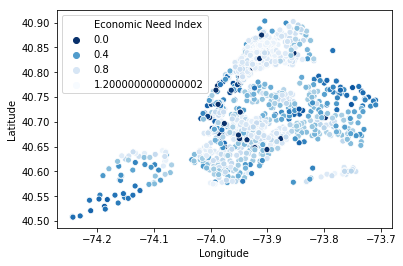

In [106]:
ax = sns.scatterplot(x=df["Longitude"], y=df["Latitude"], hue = df["Economic Need Index"], palette="Blues_r")